In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 자연처리 프레임워크 및 라이브러리 설치하기

In [3]:
# colab에 Mecab설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [4]:
%cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [5]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 86 kB 6.9 MB/s 
     |████████████████████████████████| 448 kB 47.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-08-02 10:26:26--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c2:513, 2406:da00:ff00::34cc:ea4a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=EdTQKcWjUF4C0sXAz0DGMAT14k0%3D&E

In [6]:
# 필요 프레임워크 및 라이브러리 준비
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
%cd /content/drive/MyDrive/Colab Notebooks/NLP_Classification/sentiment/Cleaned Dataset

/content/drive/MyDrive/Colab Notebooks/NLP_Classification/sentiment/Cleaned Dataset


# 데이터 로드

In [8]:
# 사전에 정제+정규화된 훈련용 통합 데이터 로드
total_data = pd.read_table('clean_total_data(app&cosmetic&movie&shopping&game).txt')
print(len(total_data))
print(total_data[:5])

499643
                                            document  label
0                              첫 독립영화  그리고 독립영화에 빠지다      1
1  횡령죄가 아니라 배임죄인것 중요합니다 참고로 예금에서 인출한것이 배임이 아니라 협력...      1
2                                     는 기억할것입니다 응다죽어      0
3          괜히 샀다 나도 모르는사이 틀딱 감성 다 사라졌네 ㅋㅋ 추억보정이 부족하다      0
4  재구매 부모님과 할머니 맛있게 드시라고 보내드렸습니다 부모님이 저번에 보내드린것이 ...      1


In [9]:
total_data_5X = pd.read_table('clean_total_data(app&cosmetic&movie&shopping&game)_5X.txt')
print(len(total_data_5X))
total_data_5X.head()

542151


,document,label
0,이 속바지를 왜 샀나싶네여 안장통땜에 샀는데 전혀 도움이 되지 않았구요 속바지 자체...,0
1,미친 여자가 분수에 발담그고 외계인과 대화하는 영화,0
2,요즘 참 인도 바라나시가 가고싶다 시바 인생을 던져 를 보고 나니 더욱 그렇다 한동...,1
3,탄막리듬겜 어렵지만 동체시력 기를땐 최고 노래도 짱이다 리게이는 필수 ㅋㅋ,1
4,맛있어요 저만 맛있는게 아닌가봐요 종종 물량 없어서 하루정도 배송 늦어질 때 있어요...,1


In [10]:
total_data_10X = pd.read_table('clean_total_data(app&cosmetic&movie&shopping&game)_10X.txt')
print(len(total_data_10X))
total_data_10X.head()

595286


,document,label
0,잘먹고 있어요 또 구입할게요,1
1,정말 접착력은 최고입니다,1
2,이건 좀 제 입맛에는 별로였어요,0
3,아니 왜 실행안되요,0
4,여러 사람이 동시에 접속하여 의사소통 할 수 있는 점이 가장 마음에 든다 특히 해외...,1


# 토큰화

In [11]:
# 불용어 파일 로드
import os
data =  open('sentiment_stopwords_v0.2.txt', 'r', encoding='utf-16')
stopwords = []
for line in data :
    line.rstrip()
    stopwords.append(line.replace("\t\n", ""))
print(len(stopwords))
print(stopwords)

772
['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를들면', '예를들자면', '저', '소인', '소생', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수없다', '해서는안된다', '뿐만아니라', '만이아니다', '만은아니다', '막론하고', '관계없이', '그치지않다', '그러나', '그런데', '하지만', '든간에', '논하지않다', '따지지않다', '설사', '비록', '더라도', '아니면', '만못하다', '하는편이낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이외에', '이밖에', '하여야', '비로소', '한다면몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할생각이다', '하려고하다', '이리하여', '그리하여', '그렇게함으로써', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '그렇지만', '이외에도', '대해말하자면', '다음에', '반대로', '반대로말하자면', '이와반대로', '바꾸어서말하면', '바꾸어서한다면', '만약', '그렇지않으면', '까악', '툭', '딱', '삐걱

In [12]:
# 훈련데이터에 형태소 분석기를 사용하여 토큰화를 하면서 불용어 제거
mecab = Mecab()
X_total = []
for sentence in total_data['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total.append(temp_X)

In [13]:
print(len(X_total))
print(X_total[:5])

499643
[['첫', '독립영화', '독립영화', '빠지'], ['횡령죄', '배임죄', '중요', '합니다', '참고', '예금', '인출', '배임', '협력', '무에', '위반', '했', '배임', '입니다'], ['기억', '할', '입니다', '죽'], ['괜히', '샀', '사이', '틀', '감성', '사라졌', '추억', '보정', '부족'], ['재', '부모', '할머니', '맛있', '드', '보내', '드렸', '부모', '저번', '보내', '드린', '맛있', '다고', '셔셔', '할머니', '맛보', '드리', '고자', '보내', '드렸', '어요', '포장', '꼼꼼', '해서', '보내', '셔셔', '감사', '해서', '보내', '드릴려고', '많이', '파', '세요']]


In [14]:
X_total_5X = []
for sentence in total_data_5X['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total_5X.append(temp_X)
print(len(total_data_5X))
total_data_5X.head()

542151


,document,label
0,이 속바지를 왜 샀나싶네여 안장통땜에 샀는데 전혀 도움이 되지 않았구요 속바지 자체...,0
1,미친 여자가 분수에 발담그고 외계인과 대화하는 영화,0
2,요즘 참 인도 바라나시가 가고싶다 시바 인생을 던져 를 보고 나니 더욱 그렇다 한동...,1
3,탄막리듬겜 어렵지만 동체시력 기를땐 최고 노래도 짱이다 리게이는 필수 ㅋㅋ,1
4,맛있어요 저만 맛있는게 아닌가봐요 종종 물량 없어서 하루정도 배송 늦어질 때 있어요...,1


In [15]:
X_total_10X = []
for sentence in total_data_10X['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total_10X.append(temp_X)
print(len(total_data_10X))
total_data_10X.head()

595286


,document,label
0,잘먹고 있어요 또 구입할게요,1
1,정말 접착력은 최고입니다,1
2,이건 좀 제 입맛에는 별로였어요,0
3,아니 왜 실행안되요,0
4,여러 사람이 동시에 접속하여 의사소통 할 수 있는 점이 가장 마음에 든다 특히 해외...,1


# 정수 인코딩

In [16]:
# 기계가 텍스트를 숫자로 처리할 수 있도록 데이터를 정수로 변환
# 일단 단어 집합을 만들자
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_total)
 # fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성한다.
 # 단어 빈도수가 높은순으로 낮은 정수 인덱스 부여

In [17]:
# 등장 빈도수가 낮은 데이터를 처리해보자
# 특정 횟수 이하 단어의 비중이 몇인지 체크
threshold = 16
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 90000
등장 빈도가 15번 이하인 희귀 단어의 수: 74275
단어 집합에서 희귀 단어의 비율: 82.52777777777777
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.813378291631198


In [18]:
# 전체 단어 개수 중 빈도수 12이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 15726


In [19]:
# 단어집합을 케라스 토크나이저의 인자로 넘겨주면, 케라스 토크나이저는 텍스트 시퀀스를 숫자 시퀀스로 변환
#Tokenizer메서드에 숫자를 입력하면 빈도수가 높은 상위 몇개 단어만 사용
tokenizer = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
# 빈도수 상위 vocab_size단어만 사용, 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
tokenizer.fit_on_texts(X_total)
# 여기까지는 보캡길이가 적용안된 것처럼 보임, 실제 적용은 text_to_sequences사용시 적용됨
X_total = tokenizer.texts_to_sequences(X_total)

# vocab_size로 지정한 단어만 보존하고 싶을 때, 굳이 안해도됨
# words_frequency = [w for w,c in tokenizer.word_index.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
# for w in words_frequency:
#     del tokenizer.word_index[w] # 해당 단어에 대한 인덱스 정보를 삭제
#     del tokenizer.word_counts[w] # 해당 단어에 대한 카운트 정보를 삭제

# 정수인코딩 결과 확인
print(len(tokenizer.word_index))
print(tokenizer.word_index)
print(tokenizer.word_counts)

# 빈도수 상위 vocabsize개수의 단어는 2 ~ vocabsize+1까지의 인덱스를 가졌으며, 그 외 단어 집합에 없는 단어들은 전부 'OOV'의 인덱스인 1로 인코딩
# 케라스 토크나이저는 기본적으로 'OOV'의 인덱스를 1로 지정
# print('단어 OOV의 인덱스 : {}'.format(tokenizer.word_index['OOV']))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
y_total = np.array(total_data['label'])

In [21]:
tokenizer_5X = Tokenizer()
tokenizer_5X.fit_on_texts(X_total_5X)
tokenizer_5X = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
tokenizer_5X.fit_on_texts(X_total_5X)
X_total_5X = tokenizer_5X.texts_to_sequences(X_total_5X)
y_total_5X = np.array(total_data_5X['label'])

In [22]:
tokenizer_10X = Tokenizer()
tokenizer_10X.fit_on_texts(X_total_10X)
tokenizer_10X = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
tokenizer_10X.fit_on_texts(X_total_10X)
X_total_10X = tokenizer_10X.texts_to_sequences(X_total_10X)
y_total_10X = np.array(total_data_10X['label'])

# 빈 샘플(empty samples)제거

In [23]:
# 각 샘플의 길이가 0인 샘플들의 인덱스 확인
drop_total = [index for index, sentence in enumerate(X_total) if len(sentence) < 1]
print(drop_total)

[111, 326, 488, 950, 1488, 2119, 2743, 2944, 3016, 3207, 3317, 3830, 4080, 4478, 4489, 4522, 5390, 7301, 7471, 7661, 7695, 7916, 8081, 8290, 8315, 8638, 8783, 9062, 9112, 9650, 9767, 10158, 10880, 10896, 11317, 12004, 13485, 13711, 13979, 14076, 14531, 15085, 15135, 16166, 16489, 16720, 16893, 16912, 17041, 17398, 17524, 17778, 17950, 18123, 18538, 19803, 20056, 20572, 21458, 21479, 21534, 21708, 22116, 22231, 22329, 22894, 23129, 23137, 23155, 23340, 23573, 23909, 24183, 24193, 24209, 24361, 24999, 25356, 25935, 26160, 26487, 26891, 27127, 27524, 28778, 29917, 30250, 30581, 30618, 31658, 31807, 32120, 32286, 32365, 32988, 33156, 34127, 34128, 34211, 34268, 34536, 34722, 35216, 35352, 35532, 35679, 36284, 36822, 37229, 37972, 38311, 38988, 39090, 39932, 39974, 40056, 40498, 40574, 40671, 41558, 41736, 41758, 42910, 43238, 43630, 43857, 44243, 44347, 44779, 45001, 45312, 46603, 46838, 47132, 47715, 49518, 49863, 49985, 50013, 50077, 50083, 50135, 50860, 50911, 51468, 51776, 51845, 52515

In [24]:
# 빈 샘플들을 제거
X_total = np.delete(X_total, drop_total, axis=0)
y_total = np.delete(y_total, drop_total, axis=0)
print(len(X_total))
print(len(y_total))

498254
498254


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [25]:
drop_total_5X = [index for index, sentence in enumerate(X_total_5X) if len(sentence) < 1]
X_total_5X = np.delete(X_total_5X, drop_total_5X, axis=0)
y_total_5X = np.delete(y_total_5X, drop_total_5X, axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [26]:
drop_total_10X = [index for index, sentence in enumerate(X_total_10X) if len(sentence) < 1]
X_total_10X = np.delete(X_total_10X, drop_total_10X, axis=0)
y_total_10X = np.delete(y_total_10X, drop_total_10X, axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


# 패딩

리뷰의 최대 길이 : 82
리뷰의 평균 길이 : 9.204494093374063


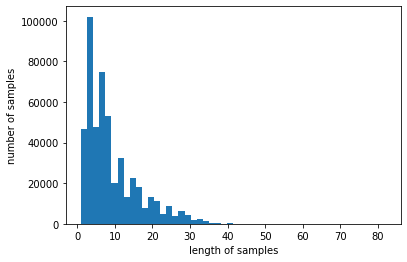

In [27]:
# 서로 다른 길이의 샘플들의 길이를 동일하게 맞춰는 작업
# 전체 데이터에서 가장 길이가 긴 리뷰와, 전체의 길이분포를 알아보자
print('리뷰의 최대 길이 :',max(len(l) for l in X_total))
print('리뷰의 평균 길이 :',sum(map(len, X_total))/len(X_total))
plt.hist([len(s) for s in X_total], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [28]:
# 최적의 길이를 찾기 위해, 전체 샘플중 길이가 max_len 이하인 샘플의 비율을 확인하는 함수 생성
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [29]:
# 비율 체크
max_len = 25
below_threshold_len(max_len, X_total)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 95.70560396905996


In [30]:
# 짧은 데이터는 0을 채우고, 기준을 넘는 데이터는 손실됨
X_total = pad_sequences(X_total, maxlen = max_len)

In [31]:
print(len(X_total))
print(len(y_total))

498254
498254


In [32]:
X_total_5X = pad_sequences(X_total_5X, maxlen = max_len)
X_total_10X = pad_sequences(X_total_10X, maxlen = max_len)

In [33]:
max_len = 25
X_total_5X = pad_sequences(X_total_5X, maxlen = max_len)

#  모델 훈련

In [34]:
# 필요한 프레임워크 및 라이브러리 임포트
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [35]:
embedding_dim = 128
dropout_prob = (0.5, 0.8)
num_filters = 128

In [36]:
model_input = Input(shape = (max_len,))
z = Embedding(vocab_size+2, embedding_dim, input_length = max_len, name="embedding")(model_input)
z = Dropout(dropout_prob[0])(z)

In [37]:
conv_blocks = []

for sz in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv = Flatten()(conv)
    conv_blocks.append(conv)

In [38]:
# 필요한 매트릭 선언, AUC-ROC, F1-Score, AUC-PR 에 필요한 지표 모두 체크
import tensorflow as tf

ROCauc = tf.keras.metrics.AUC(curve="ROC") # auc_1
PRauc = tf.keras.metrics.AUC(curve="PR") # auc_2
# RECALL = tf.keras.metrics.Recall()
# PRECISION = tf.keras.metrics.Precision()
TP = tf.keras.metrics.TruePositives()
TN = tf.keras.metrics.TrueNegatives()
FP = tf.keras.metrics.FalsePositives()
FN = tf.keras.metrics.FalseNegatives()

In [39]:
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_prob[1])(z)
z = Dense(128, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)

model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['acc', ROCauc, PRauc, TP, TN, FP, FN])

In [40]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

In [41]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('9_CNN_1D_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.fit(X_total, y_total, epochs=30, callbacks=[es, mc], batch_size = 100, validation_split=0.2)

Epoch 1/30
3987/3987 [==============================] - 121s 26ms/step - loss: 0.4401 - acc: 0.7928 - auc: 0.8775 - auc_1: 0.8761 - true_positives: 159328.0000 - true_negatives: 156693.0000 - false_positives: 40779.0000 - false_negatives: 41803.0000 - val_loss: 0.4098 - val_acc: 0.8199 - val_auc: 0.9023 - val_auc_1: 0.9006 - val_true_positives: 41198.0000 - val_true_negatives: 40508.0000 - val_false_positives: 9081.0000 - val_false_negatives: 8864.0000

Epoch 00001: val_acc improved from -inf to 0.81992, saving model to 9_CNN_1D_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5
Epoch 2/30
3987/3987 [==============================] - 106s 26ms/step - loss: 0.3926 - acc: 0.8236 - auc: 0.9043 - auc_1: 0.9028 - true_positives: 165754.0000 - true_negatives: 162526.0000 - false_positives: 34946.0000 - false_negatives: 35377.0000 - val_loss: 0.3954 - val_acc: 0.8235 - val_auc: 0.9058 - val_auc_1: 0.9041 - val_true_positives: 41021.0000 - val_true_negatives: 41043.0000 - val_false_positi

In [42]:
mc_5X = ModelCheckpoint('9_CNN_1D_KoNLPy(Mecab)_Total(movie&shopping&game&target5X)_v0.1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model.fit(X_total_5X, y_total_5X, epochs=30, callbacks=[es, mc_5X], batch_size=100, validation_split=0.2)

Epoch 1/30
4327/4327 [==============================] - 113s 26ms/step - loss: 0.5411 - acc: 0.7061 - auc: 0.7948 - auc_1: 0.8100 - true_positives: 166825.0000 - true_negatives: 138657.0000 - false_positives: 69115.0000 - false_negatives: 58012.0000 - val_loss: 0.4252 - val_acc: 0.8123 - val_auc: 0.8935 - val_auc_1: 0.8985 - val_true_positives: 46179.0000 - val_true_negatives: 41670.0000 - val_false_positives: 10303.0000 - val_false_negatives: 10001.0000

Epoch 00001: val_acc improved from -inf to 0.81227, saving model to 9_CNN_1D_KoNLPy(Mecab)_Total(movie&shopping&game&target5X)_v0.1.h5
Epoch 2/30
4327/4327 [==============================] - 112s 26ms/step - loss: 0.4109 - acc: 0.8144 - auc: 0.8949 - auc_1: 0.8989 - true_positives: 184705.0000 - true_negatives: 167607.0000 - false_positives: 40165.0000 - false_negatives: 40132.0000 - val_loss: 0.4093 - val_acc: 0.8213 - val_auc: 0.9032 - val_auc_1: 0.9090 - val_true_positives: 46757.0000 - val_true_negatives: 42070.0000 - val_false_po

In [43]:
mc_10X = ModelCheckpoint('9_CNN_1D_KoNLPy(Mecab)_Total(movie&shopping&game&target10X)_v0.1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model.fit(X_total_10X, y_total_10X, epochs=30, callbacks=[es, mc_10X], batch_size=100, validation_split=0.2)

Epoch 1/30
4752/4752 [==============================] - 119s 25ms/step - loss: 0.5739 - acc: 0.6812 - auc: 0.7601 - auc_1: 0.7890 - true_positives: 195350.0000 - true_negatives: 128303.0000 - false_positives: 92006.0000 - false_negatives: 59458.0000 - val_loss: 0.4386 - val_acc: 0.8019 - val_auc: 0.8847 - val_auc_1: 0.8975 - val_true_positives: 53035.0000 - val_true_negatives: 42217.0000 - val_false_positives: 13074.0000 - val_false_negatives: 10454.0000

Epoch 00001: val_acc improved from -inf to 0.80192, saving model to 9_CNN_1D_KoNLPy(Mecab)_Total(movie&shopping&game&target10X)_v0.1.h5
Epoch 2/30
4752/4752 [==============================] - 122s 26ms/step - loss: 0.4257 - acc: 0.8059 - auc: 0.8864 - auc_1: 0.8979 - true_positives: 209325.0000 - true_negatives: 173587.0000 - false_positives: 46722.0000 - false_negatives: 45483.0000 - val_loss: 0.4090 - val_acc: 0.8228 - val_auc: 0.9043 - val_auc_1: 0.9153 - val_true_positives: 54424.0000 - val_true_negatives: 43306.0000 - val_false_p

# 모델 성능평가(타겟데이터 기반)

In [44]:
# 평가용 토탈 데이터셋2(화장품+앱)

# 데이터 로드
total_data2 = pd.read_table('clean_total_data(app&cosmetic).txt')

# 토크나이징
X_test_total2 = []
for sentence in total_data2['document']:
    temp_X2 = mecab.morphs(sentence)
    temp_X2 = [word for word in temp_X2 if not word in stopwords]
    X_test_total2.append(temp_X2)

# 워드 벡터화
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_test_total2)
X_test_total2 = tokenizer.texts_to_sequences(X_test_total2)

# 패딩
X_test_total2 = pad_sequences(X_test_total2, maxlen = max_len)

# 라벨데이터 포함
y_test_total2 = np.array(total_data2['label'])

In [45]:
# 모델 성능 평가 
loaded_model = load_model('9_CNN_1D_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n 테스트 결과:",result)

107/107 [==============================] - 1s 5ms/step - loss: 0.8344 - acc: 0.5509 - auc: 0.5534 - auc_1: 0.7305 - true_positives: 4236.0000 - true_negatives: 1618.0000 - false_positives: 1553.0000 - false_negatives: 3220.0000

 테스트 결과: [0.8343979716300964, 0.5508610010147095, 0.5533559322357178, 0.7305499315261841, 4236.0, 1618.0, 1553.0, 3220.0]


In [46]:
#모델 성능 평가 
loaded_model = load_model('9_CNN_1D_KoNLPy(Mecab)_Total(movie&shopping&game&target5X)_v0.1.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n 5X 테스트 결과:",result)

107/107 [==============================] - 1s 5ms/step - loss: 1.0425 - acc: 0.4937 - auc: 0.4391 - auc_1: 0.6610 - true_positives: 4074.0000 - true_negatives: 1173.0000 - false_positives: 1998.0000 - false_negatives: 3382.0000

 BiLSTM5X 테스트 결과: [1.0424901247024536, 0.49374234676361084, 0.439106822013855, 0.6610162258148193, 4074.0, 1173.0, 1998.0, 3382.0]


In [47]:
#모델 성능 평가 
loaded_model = load_model('9_CNN_1D_KoNLPy(Mecab)_Total(movie&shopping&game&target10X)_v0.1.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n 10X 테스트 결과:",result)

107/107 [==============================] - 1s 5ms/step - loss: 0.8967 - acc: 0.5638 - auc: 0.5336 - auc_1: 0.7185 - true_positives: 4613.0000 - true_negatives: 1378.0000 - false_positives: 1793.0000 - false_negatives: 2843.0000

 BiLSTM10X 테스트 결과: [0.8967413902282715, 0.5637527108192444, 0.5336194634437561, 0.7185283899307251, 4613.0, 1378.0, 1793.0, 2843.0]
